In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
from skimage.io import imread
from skimage.color import rgb2gray
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler

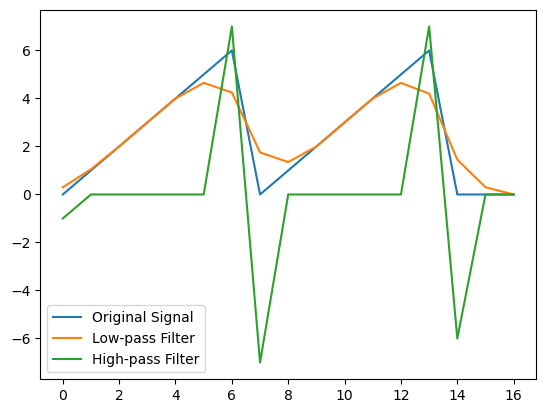

In [2]:
# ------------------------------
# A1. Convolution Exercise
# ------------------------------
X = np.array([0,1,2,3,4,5,6,0,1,2,3,4,5,6,0,0,0])
H_L = np.array([0.05, 0.2, 0.5, 0.2, 0.05])
H_H = np.array([-1, 2, -1])

y_low = np.convolve(X, H_L, mode='same')
y_high = np.convolve(X, H_H, mode='same')

plt.plot(X, label='Original Signal')
plt.plot(y_low, label='Low-pass Filter')
plt.plot(y_high, label='High-pass Filter')
plt.legend()
plt.show()

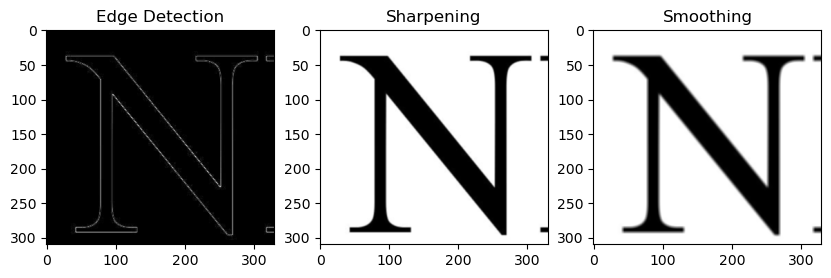

In [3]:
# ------------------------------
# A2. Image Filtering with Convolution
# ------------------------------
image_path = "Neural.JPG"  # Ensure the file is in your working directory
im = imread(image_path)
img = rgb2gray(im) * 255

img1 = img[40:350, 20:350]

fil1 = np.array([[ 0, -1,  0], [-1, 4, -1], [ 0, -1, 0]])  # Edge detection
fil2 = np.array([[ 0.2, 0.5,  0.2], [0.5, 1, 0.5], [0.2, 0.5, 0.2]])  # Sharpening
fil3 = np.ones((5, 5)) / 25  # Smoothing

grad1 = signal.convolve2d(img1, fil1, boundary='symm', mode='same')
grad2 = signal.convolve2d(img1, fil2, boundary='symm', mode='same')
grad3 = signal.convolve2d(img1, fil3, boundary='symm', mode='same')

plt.figure(figsize=(10, 5))
plt.subplot(1, 3, 1)
plt.imshow(abs(grad1), cmap='gray')
plt.title("Edge Detection")
plt.subplot(1, 3, 2)
plt.imshow(grad2, cmap='gray')
plt.title("Sharpening")
plt.subplot(1, 3, 3)
plt.imshow(grad3, cmap='gray')
plt.title("Smoothing")
plt.show()


In [4]:
# ------------------------------
# A3. CNN for Drowsiness Detection
# ------------------------------
from tensorflow.keras.preprocessing.image import ImageDataGenerator

data_dir = "drownsiness_dataset"  # Update with correct dataset path
img_size = (64, 64)
batch_size = 32

train_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

train_generator = train_datagen.flow_from_directory(
    data_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='binary',
    subset='training'
)

val_generator = train_datagen.flow_from_directory(
    data_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='binary',
    subset='validation'
)

model = keras.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

history = model.fit(train_generator, validation_data=val_generator, epochs=10)


Found 38400 images belonging to 2 classes.
Found 9600 images belonging to 2 classes.


C:\Users\venka\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10


C:\Users\venka\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1200/1200 ━━━━━━━━━━━━━━━━━━━━ 277s 226ms/step - accuracy: 0.8862 - loss: 0.2626 - val_accuracy: 0.9358 - val_loss: 0.1667
Epoch 2/10
1200/1200 ━━━━━━━━━━━━━━━━━━━━ 243s 202ms/step - accuracy: 0.9736 - loss: 0.0775 - val_accuracy: 0.9443 - val_loss: 0.1470
Epoch 3/10
1200/1200 ━━━━━━━━━━━━━━━━━━━━ 227s 189ms/step - accuracy: 0.9856 - loss: 0.0438 - val_accuracy: 0.9114 - val_loss: 0.2400
Epoch 4/10
1200/1200 ━━━━━━━━━━━━━━━━━━━━ 229s 190ms/step - accuracy: 0.9901 - loss: 0.0315 - val_accuracy: 0.9394 - val_loss: 0.2006
Epoch 5/10
1200/1200 ━━━━━━━━━━━━━━━━━━━━ 231s 192ms/step - accuracy: 0.9924 - loss: 0.0236 - val_accuracy: 0.9360 - val_loss: 0.2422
Epoch 6/10
1200/1200 ━━━━━━━━━━━━━━━━━━━━ 232s 192ms/step - accuracy: 0.9931 - loss: 0.0216 - val_accuracy: 0.9044 - val_loss: 0.3434
Epoch 7/10
1200/1200 ━━━━━━━━━━━━━━━━━━━━ 230s 191ms/step - accuracy: 0.9942 - loss: 0.0195 - val_accuracy: 0.9038 - val_loss: 0.3705
Epoch 8/10
1200/1200 ━━━━━━━━━━━━━━━━━━━━ 242s 201ms/step - accuracy: 0.9

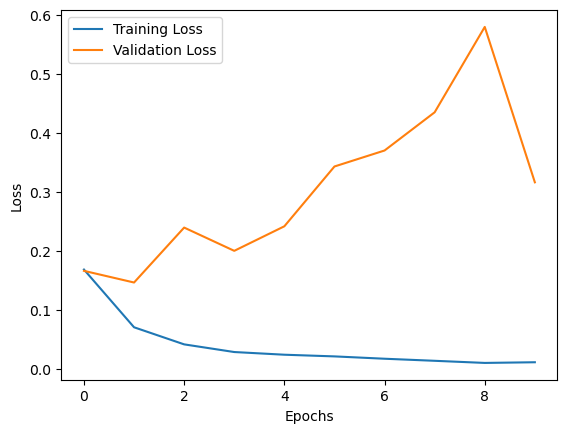

In [5]:
# ------------------------------
# A4. Training & Validation Loss Plot
# ------------------------------
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
# ------------------------------
# A5. Model Testing and Performance Metrics
# ------------------------------
loss, accuracy = model.evaluate(val_generator)
print(f"Validation Accuracy: {accuracy * 100:.2f}%")

108/300 ━━━━━━━━━━━━━━━━━━━━ 22s 118ms/step - accuracy: 0.9371 - loss: 0.2763